In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv("data/laptop-clean.csv")

In [5]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,os,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel
4,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420,4,AMD Radeon R5,Windows 10,400.00,1366x768,NaN,0.0,3.0,500.0,HDD,0.0,NaN,AMD,AMD


In [6]:
# Splitting into X and y
X = df.drop(columns=["price"],axis=1)

In [7]:
X.head()

,company,product,typename,inches,cpu,ram(GB),gpu,os,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel
4,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420,4,AMD Radeon R5,Windows 10,1366x768,NaN,0.0,3.0,500.0,HDD,0.0,NaN,AMD,AMD


In [8]:
y = df["price"]

In [9]:
y.head()

0    1339.69
1     898.94
2     575.00
3    1803.60
4     400.00
Name: price, dtype: float64

In [17]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [19]:
X = preprocessor.fit_transform(X)

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((987, 853), (247, 853))

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 99.6707
- Mean Absolute Error: 50.7069
- R2 Score: 0.9787
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 282.7949
- Mean Absolute Error: 198.3091
- R2 Score: 0.8611


Lasso
Model performance for Training set
- Root Mean Squared Error: 238.2503
- Mean Absolute Error: 175.3317
- R2 Score: 0.8784
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 250.6123
- Mean Absolute Error: 182.5312
- R2 Score: 0.8909


Ridge
Model performance for Training set
- Root Mean Squared Error: 150.9562
- Mean Absolute Error: 105.0644
- R2 Score: 0.9512
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 231.3675
- Mean Absolute Error: 167.0921
- R2 Score: 0.9071


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 254.4323
- Mean Absolute Error: 159.2563
- R2 Score: 0.86

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.925742
6,XGBRegressor,0.919979
5,Random Forest Regressor,0.908384
2,Ridge,0.907052
1,Lasso,0.890947
0,Linear Regression,0.861140
3,K-Neighbors Regressor,0.824835
4,Decision Tree,0.823461
8,AdaBoost Regressor,0.668978


## CatBoost Regressor
- From the above results CatBoosting Regressor works the best for our dataset

In [26]:
cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train,y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 92.57


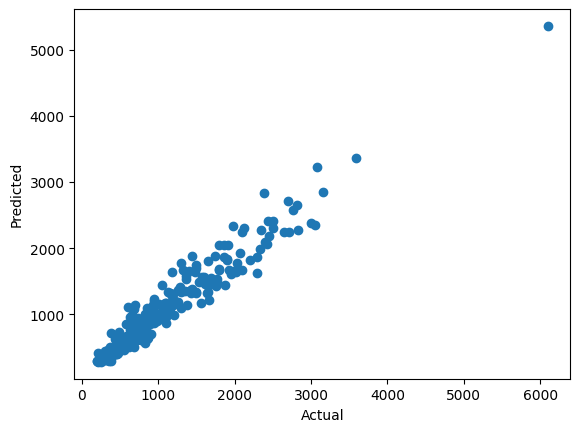

In [27]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

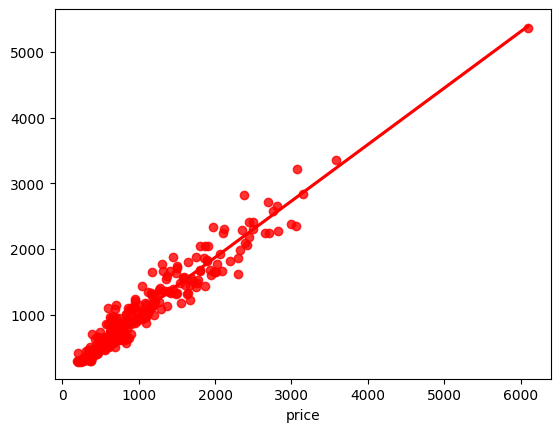

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
753,3588.8,3356.698450,232.101550
582,2299.0,1868.765964,430.234036
548,389.0,711.515894,-322.515894
113,629.0,721.425138,-92.425138
174,2397.0,2088.232835,308.767165
...,...,...,...
31,367.0,509.759967,-142.759967
778,629.0,536.859890,92.140110
910,619.0,610.891896,8.108104
361,309.0,444.275276,-135.275276
